C:\Users\dhana\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\dhana\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensur

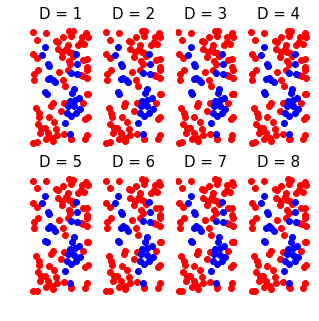

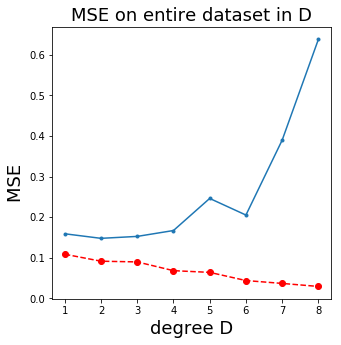

In [15]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split


### load data ###
def load_data():
    # load data from file
    data = np.array(np.genfromtxt('2eggs_data.csv', delimiter=','))
    X = data[:,0:-1]
    y = data[:,-1]
    
    return X,y

def sigmoid(z):
    return 1/(1+np.exp(-z))

def poly_features(X,D):
    o = np.ones((np.shape(X)[0],1))
    F = o
    for i in range(1,D+1):
        temp = np.array((X[:,0]**0)*(X[:,1]**(i-0)))
        for j in range(1,i+1):
            temp2 = np.array((X[:,0]**j)*(X[:,1]**(i-j)))
            temp = np.column_stack((temp,temp2))
        F = np.column_stack((F,temp))
    return F    

def poly_features1(X,D):
    o = np.ones((np.shape(X)[0],1))
    F = o
    for i in range(1,D+1):
        temp = np.array((X[:,0]**0)*(X[:,1]**(i-0)))
        for j in range(1,i+1):
            temp2 = np.array((X[:,0]**j)*(X[:,1]**(i-j)))
            temp = np.column_stack((temp,temp2))
        F = np.column_stack((F,temp))
        
        
    return F    

### plots learned model ###
def plot_poly(w,deg):
    # Generate poly seperator
    o = np.arange(-2,10,.01)
    s, t = np.meshgrid(o,o)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    f = np.zeros((np.size(s),1))
    count = 0

    for n in np.arange(0,deg+1):
        for m in np.arange(0,deg+1):
            if (n + m <= deg):
                f = f + w[count]*((s**n)*(t**m))
                count = count + 1

    s = np.reshape(s,(np.size(o),np.size(o)))
    t = np.reshape(t,(np.size(o),np.size(o)))
    f = np.reshape(f,(np.size(o),np.size(o)))

    # plot contour in original space
    plt.contour(s,t,f,1, colors =color)

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.axis('equal')


def plot_data(A,b,deg):
    for i in np.arange(1,9):
        plt.subplot(2,4,i)

        # plot data
        ind = np.nonzero(b==1)[0]
        plt.plot(A[ind,0],A[ind,1],'ro')
        ind = np.nonzero(b==-1)[0]
        plt.plot(A[ind,0],A[ind,1],'bo')
        plt.hold(True)

        # graph info labels
        s = 'D = ' + str(deg[i-1])
        plt.title(s, fontsize=15)
        plt.axis('off')
        
# plot mse's over all D tested 
def plot_mse(mses,mses1,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')   
    plt.plot(np.arange(1,np.size(mses1)+1),mses1,'.-')    
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)

   
        
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(A,b,deg_range):
    colors = ['m','b','r','c']
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (5,5))
    plot_data(x,y,deg_range)
    global M
    M = 4     # number of hidden units


    A,b=load_data()
    
    N = np.shape(A)[0]
    P = np.shape(A)[1]
    c = np.random.randn(M,1)
    V = (np.random.randn(N,M))  
    A=x
    b=y
    colors = ['m','b','r','c']
    

    # generate nonlinear feature
    
    
    kf = KFold(n_splits=3)
    KFold(n_splits=3)
    k=3
    
    mse_Train=[]
    mse1_Test=[]
    mse_Train = np.zeros((np.size(deg_range)))
    mse1_Test = np.zeros((np.size(deg_range)))
    
    for D in np.arange(0,len(deg_range)):
        
        # generate poly feature transformation
            for train_index, test_index in kf.split(x):   
                    X_train, X_test = x[train_index], x[test_index]
                    Y_train, Y_test = y[train_index], y[test_index] 
        
                    F = poly_features(X_train,deg_range[D])
                   
                    F1 = poly_features1(X_test,deg_range[D])
                                      
                    temp = np.linalg.pinv(np.dot(F,F.T))
                    w = np.dot(np.dot(temp,F).T,Y_train)
                    mse = np.linalg.norm(np.dot(F,w)-Y_train)/(np.size(Y_train))
                    mse_Train[D]+=mse  
       
                
                    temp1 = np.linalg.pinv(np.dot(F1,F1.T))
                
                    mse1 = np.linalg.norm(np.dot(F1,w)-Y_test)/(np.size(Y_test))   
                    
                    mse1_Test[D] +=mse1
                    
                    
                    # plot fit to data
                    plt.subplot(2,4,D+1) 
                    #b,w,c,V = tanh_softmax(X.T,y,M)
                    #plot_poly(w,deg_range[D])
                    
                    

                    
            mse_Train[D]=mse_Train[D]/k
            mse1_Test[D]=mse1_Test[D]/k 
            
            
    
    fig = plt.figure(figsize = (5,5))
    plot_mse(mse_Train,mse1_Test,deg_range)
    plt.show() 

x,y=load_data()    
deg_range = [1,2,3,4,5,6,7,8]           # degree polys to try
try_all_degs(x,y,deg_range)